In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Exploring and Analyzing Text Data Assignment 

In [10]:
import nltk

nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wyattgarner/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

<IPython.core.display.Javascript object>

In [28]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

<IPython.core.display.Javascript object>

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [3]:
DOC_PATTERN = ".*\.txt"

corpus = PlaintextCorpusReader("articles/", DOC_PATTERN)

<IPython.core.display.Javascript object>

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [4]:
raw_list = []

for item in corpus.fileids():
    raw_list.append(corpus.raw(item))

raw_list

['Pink taking a break to focus on family (CNN) - Pink has been working pretty hard and it sounds like she will be taking a step back in 2020. Speaking with "Entertainment Tonight" on the Country Music Association Awards red carpet, the singer was joined by her husband, Carey Hart, and their kids Willow, 8, and Jameson, 2. Pink was there to perform her song "Love Me Anyway" with country star Chris Stapleton, and she  talked about how hectic things have been.  "We did two and a half years of [music] and Willow\'s back in school now, Jameson\'s going to start pre-school soon," Pink said. "It\'s kind of the year of the family." The star also praised her husband, with whom she will celebrate 14 years of marriage in January. "Carey has a lot going on as well," she said of Hart, who went from being a professional motocross competitor to racing off-road trucks. "He\'s super supportive, he follows me around the world and now it\'s his turn." According to Billboard, Pink\'s Beautiful Trauma Tour

<IPython.core.display.Javascript object>

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [8]:
text_list = []
for x in corpus.fileids():
    text = corpus.words(x)
    text_list.append(" ".join(text))

text_df = pd.DataFrame({"id": corpus.fileids(), "text": text_list})

<IPython.core.display.Javascript object>

In [11]:
sent_token_list = []
word_token_list = []
tag_list = []

for x in text_df["text"]:
    sents = sent_tokenize(x)
    tokenized = [word_tokenize(sent) for sent in sents]
    tagged = [pos_tag(tokens) for tokens in tokenized]

    sent_token_list.append(sents)
    word_token_list.append(tokenized)
    tag_list.append(tagged)

text_df["sent_token"] = sent_token_list
text_df["word_tagged"] = tag_list
text_df["word_token"] = word_token_list

<IPython.core.display.Javascript object>

In [19]:
word_token_2 = []
words_3_list = []
for x in text_df["text"]:
    words_3 = word_tokenize(x)
    no_stopwords = [
        token.lower()
        for token in words_3
        if token.lower() not in stopwords.words("english") and token.lower().isalpha()
    ]

    word_token_2.append(no_stopwords)
    words_3_list.append(words_3)

text_df["no_stops"] = word_token_2
text_df["words_3"] = words_3_list

<IPython.core.display.Javascript object>

In [38]:
vocab_list = []
for x in text_df["no_stops"]:
    temp = len(set([w.lower() for w in x]))
    vocab_list.append(temp)

text_df["#_vocab"] = vocab_list

<IPython.core.display.Javascript object>

In [24]:
import sys

<IPython.core.display.Javascript object>

In [36]:
nlp = spacy.load("en_core_web_sm")
remove = ["DATE", "TIME", "PERCENT", "MONEY", "QUANTITY", "ORDINAL", "CARDINAL"]
entity_list = []
for x in text_list:
    spacy_doc = nlp(x)
    entities = [
        [entity.text, entity.label_]
        for entity in spacy_doc.ents
        if entity.label_ not in remove
    ]

    dup_check = []
    new_entities = []
    for elem in entities:
        if elem[0] not in dup_check:
            new_entities.append(elem)
            dup_check.append(elem[0])

    entity_list.append(new_entities)

text_df["entities"] = entity_list

<IPython.core.display.Javascript object>

In [43]:
word_length_list = []
for x in word_token_2:
    characters = sum([len(word) for word in x])
    char_word = characters / len(x)
    word_length_list.append(round(char_word, 2))

text_df["#_char_per_words"] = word_length_list

<IPython.core.display.Javascript object>

In [44]:
text_df

,id,text,sent_token,word_tagged,word_token,no_stops,words_3,vocab,entities,#_vocab,#_char_per_words
0,article0.txt,Pink taking a break to focus on family ( CNN )...,[Pink taking a break to focus on family ( CNN ...,"[[(Pink, NNP), (taking, VBG), (a, DT), (break,...","[[Pink, taking, a, break, to, focus, on, famil...","[pink, taking, break, focus, family, cnn, pink...","[Pink, taking, a, break, to, focus, on, family...",98,"[[CNN, ORG], [Entertainment Tonight, WORK_OF_A...",98,5.72
1,article1.txt,Deval Patrick tells allies he ' s running for ...,[Deval Patrick tells allies he ' s running for...,"[[(Deval, NNP), (Patrick, NNP), (tells, VBZ), ...","[[Deval, Patrick, tells, allies, he, ', s, run...","[deval, patrick, tells, allies, running, presi...","[Deval, Patrick, tells, allies, he, ', s, runn...",265,"[[Deval Patrick, PERSON], [CNN, ORG], [Massach...",265,6.34
2,article10.txt,"Meet Narwhal , the rescue puppy with a tail gr...","[Meet Narwhal , the rescue puppy with a tail g...","[[(Meet, NNP), (Narwhal, NNP), (,, ,), (the, D...","[[Meet, Narwhal, ,, the, rescue, puppy, with, ...","[meet, narwhal, rescue, puppy, tail, growing, ...","[Meet, Narwhal, ,, the, rescue, puppy, with, a...",181,"[[Meet Narwhal, PERSON], [CNN, ORG], [Missouri...",181,5.87
3,article11.txt,Democrats ' 2020 uncertainty has heavyweights ...,[Democrats ' 2020 uncertainty has heavyweights...,"[[(Democrats, NNPS), (', POS), (2020, CD), (un...","[[Democrats, ', 2020, uncertainty, has, heavyw...","[democrats, uncertainty, heavyweights, thinkin...","[Democrats, ', 2020, uncertainty, has, heavywe...",324,"[[Democrats, NORP], [CNN, ORG], [Democratic, N...",324,6.18
4,article12.txt,Most important takeaways from the first day of...,[Most important takeaways from the first day o...,"[[(Most, RBS), (important, JJ), (takeaways, NN...","[[Most, important, takeaways, from, the, first...","[important, takeaways, first, day, public, imp...","[Most, important, takeaways, from, the, first,...",588,"[[CNN, ORG], [The House Intelligence Committee...",588,6.62
5,article13.txt,How I became an all - American Muslim girl Edi...,[How I became an all - American Muslim girl Ed...,"[[(How, WRB), (I, PRP), (became, VBD), (an, DT...","[[How, I, became, an, all, -, American, Muslim...","[became, american, muslim, girl, editor, note,...","[How, I, became, an, all, -, American, Muslim,...",379,"[[Muslim, NORP], [Jolie Courtney, PERSON], [Al...",379,6.17
6,article2.txt,Fox ' s prime time stars are telling Trump tha...,[Fox ' s prime time stars are telling Trump th...,"[[(Fox, NNP), (', POS), (s, JJ), (prime, JJ), ...","[[Fox, ', s, prime, time, stars, are, telling,...","[fox, prime, time, stars, telling, trump, impe...","[Fox, ', s, prime, time, stars, are, telling, ...",512,"[[Fox, ORG], [Trump, PRODUCT], [Democrats, NOR...",512,6.05
7,article3.txt,Marine deserter wanted for murder spotted in R...,[Marine deserter wanted for murder spotted in ...,"[[(Marine, NNP), (deserter, NN), (wanted, VBD)...","[[Marine, deserter, wanted, for, murder, spott...","[marine, deserter, wanted, murder, spotted, ro...","[Marine, deserter, wanted, for, murder, spotte...",282,"[[Roanoke, GPE], [Virginia, GPE], [CNN, ORG], ...",282,6.06
8,article4.txt,Trump Organization explores selling DC hotel (...,[Trump Organization explores selling DC hotel ...,"[[(Trump, NNP), (Organization, NNP), (explores...","[[Trump, Organization, explores, selling, DC, ...","[trump, organization, explores, selling, dc, h...","[Trump, Organization, explores, selling, DC, h...",200,"[[Trump Organization, ORG], [CNN, ORG], [The T...",200,6.62
9,article5.txt,Alicia Keys will return as host of the Grammy ...,[Alicia Keys will return as host of the Grammy...,"[[(Alicia, NNP), (Keys, NNP), (will, MD), (ret...","[[Alicia, Keys, will, return, as, host, of, th...","[alicia, keys, return, host, grammy, awards, c...","[Alicia, Keys, will, return, as, host, of, the...",105,"[[Alicia Keys, PERSON], [the Grammy Awards, EV...",105,5.40


<IPython.core.display.Javascript object>

In [48]:
text_df["#_sent"] = text_df["sent_token"].str.len()
text_df["#_tokens"] = text_df["words_3"].str.len()
text_df["#_words"] = text_df["no_stops"].str.len()
text_df["#_entities"] = text_df["entities"].str.len()
text_df["#_words_per_sent"] = (
    text_df["word_token"].str.len() / text_df["#_sent"].astype(str).str.len()
)
text_df["#_lex_div"] = text_df["vocab"] / text_df["no_stops"].str.len()

# text_df = text_df.set_index("id")

text_df

,text,sent_token,word_tagged,word_token,no_stops,words_3,vocab,entities,#_vocab,#_char_per_words,#_sent,#_tokens,#_words,#_entities,#_words_per_sent,#_lex_div
id,,,,,,,,,,,,,,,,
article0.txt,Pink taking a break to focus on family ( CNN )...,[Pink taking a break to focus on family ( CNN ...,"[[(Pink, NNP), (taking, VBG), (a, DT), (break,...","[[Pink, taking, a, break, to, focus, on, famil...","[pink, taking, break, focus, family, cnn, pink...","[Pink, taking, a, break, to, focus, on, family...",98,"[[CNN, ORG], [Entertainment Tonight, WORK_OF_A...",98,5.72,13,279,120,14,6.5,0.816667
article1.txt,Deval Patrick tells allies he ' s running for ...,[Deval Patrick tells allies he ' s running for...,"[[(Deval, NNP), (Patrick, NNP), (tells, VBZ), ...","[[Deval, Patrick, tells, allies, he, ', s, run...","[deval, patrick, tells, allies, running, presi...","[Deval, Patrick, tells, allies, he, ', s, runn...",265,"[[Deval Patrick, PERSON], [CNN, ORG], [Massach...",265,6.34,27,748,371,33,13.5,0.714286
article10.txt,"Meet Narwhal , the rescue puppy with a tail gr...","[Meet Narwhal , the rescue puppy with a tail g...","[[(Meet, NNP), (Narwhal, NNP), (,, ,), (the, D...","[[Meet, Narwhal, ,, the, rescue, puppy, with, ...","[meet, narwhal, rescue, puppy, tail, growing, ...","[Meet, Narwhal, ,, the, rescue, puppy, with, a...",181,"[[Meet Narwhal, PERSON], [CNN, ORG], [Missouri...",181,5.87,26,619,262,14,13.0,0.690840
article11.txt,Democrats ' 2020 uncertainty has heavyweights ...,[Democrats ' 2020 uncertainty has heavyweights...,"[[(Democrats, NNPS), (', POS), (2020, CD), (un...","[[Democrats, ', 2020, uncertainty, has, heavyw...","[democrats, uncertainty, heavyweights, thinkin...","[Democrats, ', 2020, uncertainty, has, heavywe...",324,"[[Democrats, NORP], [CNN, ORG], [Democratic, N...",324,6.18,43,1105,494,43,21.5,0.655870
article12.txt,Most important takeaways from the first day of...,[Most important takeaways from the first day o...,"[[(Most, RBS), (important, JJ), (takeaways, NN...","[[Most, important, takeaways, from, the, first...","[important, takeaways, first, day, public, imp...","[Most, important, takeaways, from, the, first,...",588,"[[CNN, ORG], [The House Intelligence Committee...",588,6.62,98,2144,971,78,49.0,0.605561
article13.txt,How I became an all - American Muslim girl Edi...,[How I became an all - American Muslim girl Ed...,"[[(How, WRB), (I, PRP), (became, VBD), (an, DT...","[[How, I, became, an, all, -, American, Muslim...","[became, american, muslim, girl, editor, note,...","[How, I, became, an, all, -, American, Muslim,...",379,"[[Muslim, NORP], [Jolie Courtney, PERSON], [Al...",379,6.17,60,1383,551,30,30.0,0.687840
article2.txt,Fox ' s prime time stars are telling Trump tha...,[Fox ' s prime time stars are telling Trump th...,"[[(Fox, NNP), (', POS), (s, JJ), (prime, JJ), ...","[[Fox, ', s, prime, time, stars, are, telling,...","[fox, prime, time, stars, telling, trump, impe...","[Fox, ', s, prime, time, stars, are, telling, ...",512,"[[Fox, ORG], [Trump, PRODUCT], [Democrats, NOR...",512,6.05,93,1947,865,82,46.5,0.591908
article3.txt,Marine deserter wanted for murder spotted in R...,[Marine deserter wanted for murder spotted in ...,"[[(Marine, NNP), (deserter, NN), (wanted, VBD)...","[[Marine, deserter, wanted, for, murder, spott...","[marine, deserter, wanted, murder, spotted, ro...","[Marine, deserter, wanted, for, murder, spotte...",282,"[[Roanoke, GPE], [Virginia, GPE], [CNN, ORG], ...",282,6.06,47,901,428,30,23.5,0.658879
article4.txt,Trump Organization explores selling DC hotel (...,[Trump Organization explores selling DC hotel ...,"[[(Trump, NNP), (Organization, NNP), (explores...","[[Trump, Organization, explores, selling, DC, ...","[trump, organization, explores, selling, dc, h...","[Trump, Organization, explores, selling, DC, h...",200,"[[Trump Organization, ORG], [CNN, ORG], [The T...",200,6.62,24,600,300,32,12.0,0.666667


<IPython.core.display.Javascript object>

In [56]:
drop_cols = [col for col in text_df.columns if "#" not in col]
print(drop_cols)
text_df = text_df.drop(drop_cols, axis=1)

['text', 'sent_token', 'word_tagged', 'word_token', 'no_stops', 'words_3', 'vocab', 'entities']


<IPython.core.display.Javascript object>

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [57]:
text_df

,#_vocab,#_char_per_words,#_sent,#_tokens,#_words,#_entities,#_words_per_sent,#_lex_div
id,,,,,,,,
article0.txt,98,5.72,13,279,120,14,6.5,0.816667
article1.txt,265,6.34,27,748,371,33,13.5,0.714286
article10.txt,181,5.87,26,619,262,14,13.0,0.690840
article11.txt,324,6.18,43,1105,494,43,21.5,0.655870
article12.txt,588,6.62,98,2144,971,78,49.0,0.605561
article13.txt,379,6.17,60,1383,551,30,30.0,0.687840
article2.txt,512,6.05,93,1947,865,82,46.5,0.591908
article3.txt,282,6.06,47,901,428,30,23.5,0.658879
article4.txt,200,6.62,24,600,300,32,12.0,0.666667


<IPython.core.display.Javascript object>

### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [58]:
text_df.describe()

,#_vocab,#_char_per_words,#_sent,#_tokens,#_words,#_entities,#_words_per_sent,#_lex_div
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,311.642857,6.210000,44.928571,1023.285714,476.785714,36.714286,22.464286,0.681106
std,163.579953,0.408939,27.257926,594.209291,275.043543,22.879042,13.628963,0.062503
min,98.000000,5.400000,13.000000,279.000000,120.000000,12.000000,6.500000,0.591908
25%,185.750000,6.050000,24.500000,604.750000,271.500000,18.000000,12.250000,0.648481
50%,303.000000,6.175000,44.500000,1003.000000,461.000000,31.500000,22.250000,0.671495
75%,423.250000,6.432500,58.000000,1363.250000,646.250000,41.750000,29.000000,0.708424
max,588.000000,7.010000,98.000000,2144.000000,971.000000,82.000000,49.000000,0.816667


<IPython.core.display.Javascript object>

### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

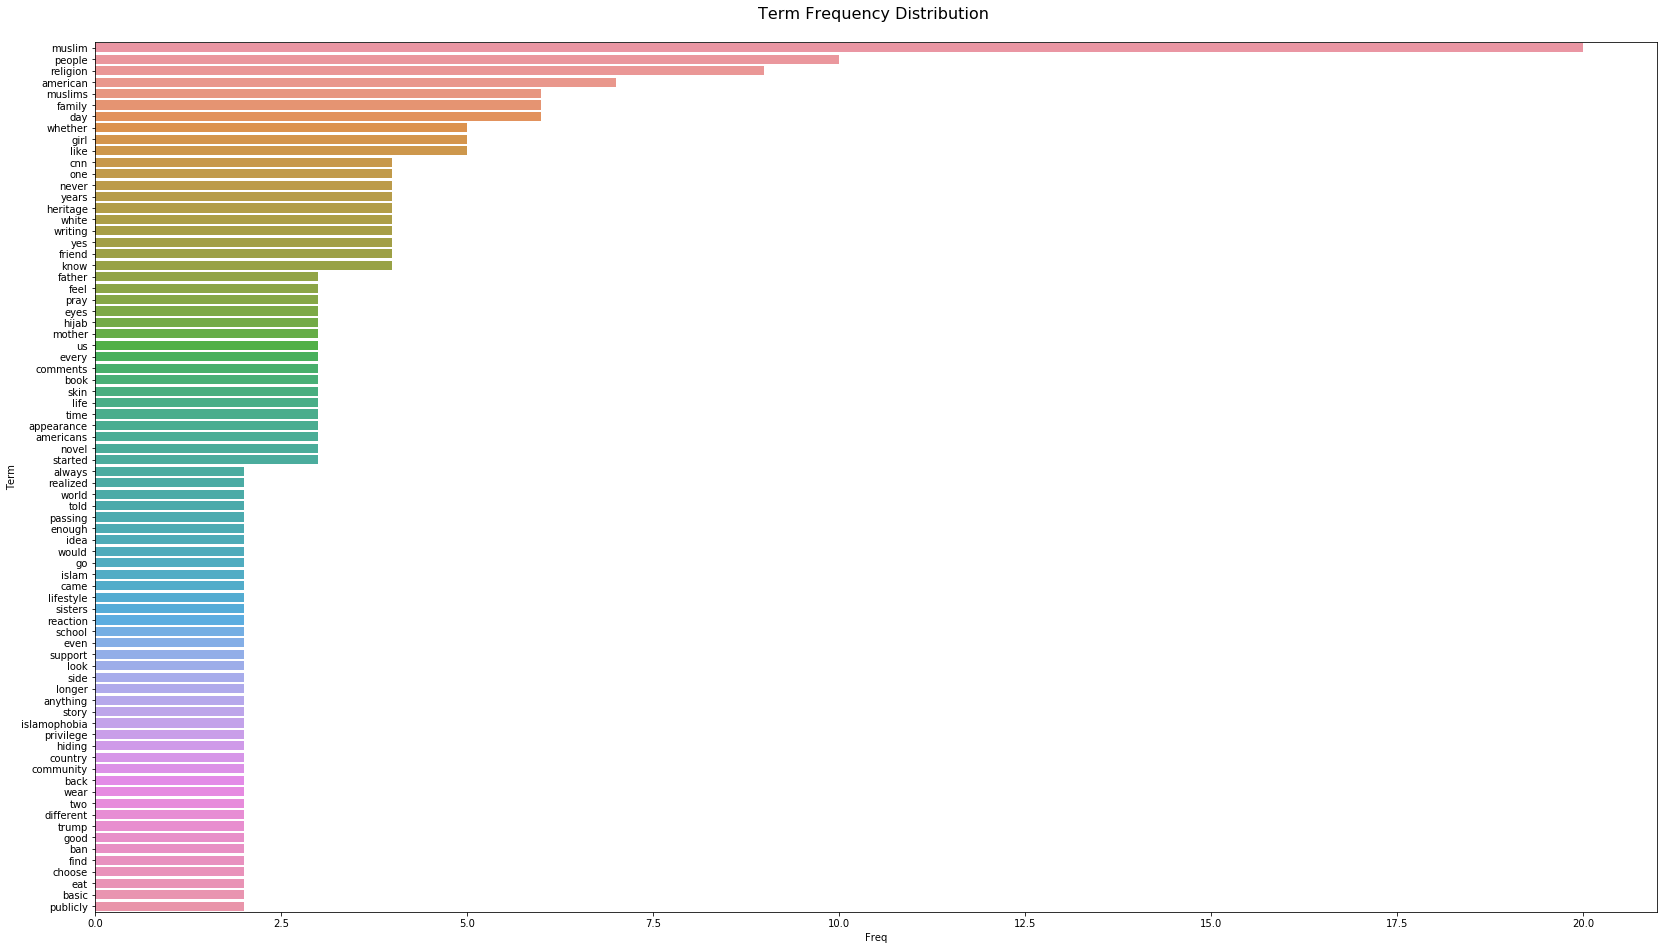

<IPython.core.display.Javascript object>

In [64]:
doc = text_list[5]
cleaned = [
    token.lower()
    for token in word_tokenize(doc)
    if token.lower() not in stopwords.words("english")
    if token.isalpha()
]

fdist = FreqDist(cleaned)
fdist_df = pd.DataFrame.from_dict(fdist, orient="index").reset_index()
fdist_df.columns = ["Term", "Freq"]
ordered = fdist_df.sort_values("Freq", ascending=False)
filtered = ordered[ordered["Freq"] > 1]

plt.figure(figsize=(28, 16))
sns.barplot(data=filtered, x="Freq", y="Term")
plt.title("Term Frequency Distribution \n", fontsize=16)
plt.show()

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [72]:
def word_cloud(text, colormap="tab10", background_color="white"):
    cloud = WordCloud(
        width=1600,
        height=800,
        stopwords=STOPWORDS,
        colormap=colormap,
        background_color=background_color,
    ).generate(text)

    plt.figure(figsize=(12, 10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

<IPython.core.display.Javascript object>

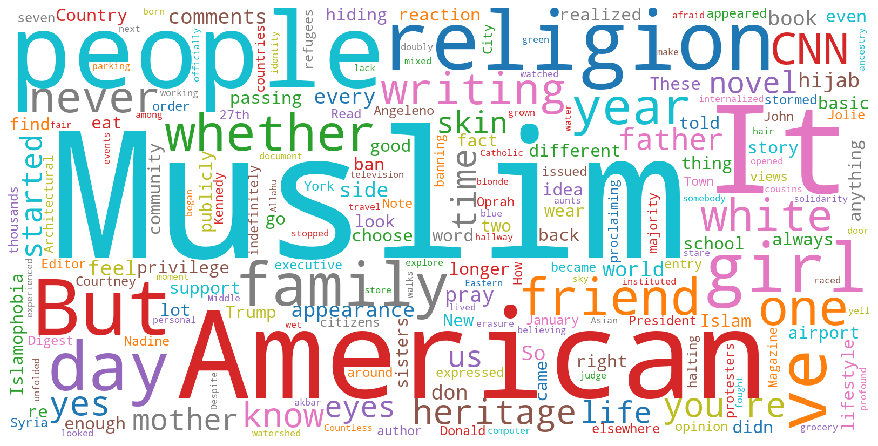

<IPython.core.display.Javascript object>

In [73]:
word_cloud(doc)

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

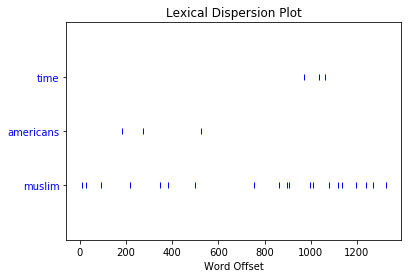

<IPython.core.display.Javascript object>

In [71]:
tokenized = word_tokenize(doc.lower())
key_words = ["time", "americans", "muslim"]
Text(tokenized).dispersion_plot(key_words)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [74]:
from yellowbrick.text.postag import PosTagVisualizer

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

In [91]:
tokens = word_tokenize(doc)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(" ".join((visualizer._make_tag_map(token, color) for color, token in tagged)))

TypeError: _make_tag_map() takes 2 positional arguments but 3 were given

<IPython.core.display.Javascript object>

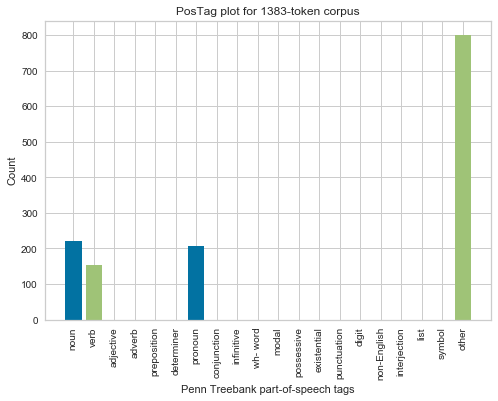

<IPython.core.display.Javascript object>

In [90]:
viz = PosTagVisualizer(parser="spacy")
viz.fit(doc)
viz.show()

In [76]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_fig',
 '_get_param_names',
 '_get_tags',
 '_handle_treebank',
 '_handle_universal',
 '_make_tag_map',
 '_more_tags',
 '_parser',
 '_penn_tag_map',
 '_size',
 '_uni_tag_map',
 'ax',
 'color',
 'colormap',
 'colors',
 'draw',
 'fig',
 'finalize',
 'fit',
 'fit_transform',
 'fit_transform_show',
 'frequency',
 'get_params',
 'parse_nltk',
 'parse_spacy',
 'parser',
 'poof',
 'punct_tags',
 'set_params',
 'set_title',
 'show',
 'size',
 'stack',
 'tagset',
 'tagset_names',
 'title',
 'transform']

<IPython.core.display.Javascript object>